# PART B: BRISTOL AIR-QUALITY [90 POINTS]

For the next part of the assignment we will use a subset of the Bristol Air-Quality Dataset.
This dataset deals with monitoring several pollutants in and around the city of Bristol.
These are identied by latitute/longitude positions which are further assigned a unique
SiteID . Readings are taken at hourly intervals from across the sites.
In order to make the analysis manageable we will again provide you with partially curated
versions of the dataset, stored as compressed csv les under the Data/PartB directory.
Again, the les contain a header within the rst row. Note that we provide multiple
versions of the data for dierent questions, and in some cases, we anonymise aspects of
the data: make sure to use the version that is appropriate for the question.

In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
%matplotlib inline



In [3]:
#Loading Data Set
data_path_ba_exploratory = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_Exploratory.csv')
data_path_ba_day = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_DayAligned.csv')
data_path_ba_site = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_SiteAligned.csv')
                                                                            
ba_e = pd.read_csv(data_path_ba_exploratory,compression='bz2',delimiter = ',')
#ba_d = pd.read_csv(data_path_ba_day,compression='bz2',delimiter = ',')
#ba_s = pd.read_csv(data_path_ba_site,compression='bz2',delimiter = ',')

print('Number of instances of training data: {}, number of attributes: {}'.format(ba_e.shape[0], ba_e.shape[1]))

Number of instances of training data: 1306758, number of attributes: 7


In [3]:
# fig, ax = plt.subplots()
# landsat['class'].astype('category').value_counts(sort=False).plot(kind='bar', ax=ax) 
# labels = [int(ticklabel.get_text()) for ticklabel in ax.get_xticklabels()] 
# ax.set_xticklabels([class_categories[l-1] for l in labels])
# plt.xlabel('Classes')
# plt.ylabel('Count')
# plt.title('Class distribution')
# plt.show()

In [4]:
ba_e.isnull().sum(axis = 0)

Date Time         0
NOx          115538
NO2          118332
NO           109222
SiteID            0
Loc.Lat           0
Loc.Long          0
dtype: int64

In [5]:
x=ba_e[['NOx','NO2','NO']]
x[x<0 ].count()

NOx     85
NO2     98
NO     542
dtype: int64

In [6]:
x[x<0 | x.isnull()].count() 
#ba_e.sort_values('Date Time')

NOx     85
NO2     98
NO     542
dtype: int64

In [7]:
#ba_e.groupby('SiteID').size()

In [8]:
#ba_e.head()

# Question 4 : (30 Points) Exploratory Analysis
We will begin by exploring the Dataset to familiarise ourselves with it.
Load the dataset BristolAir_Exploratory.csv into a pandas dataframe. Again, you
should use pandas.read_csv() with the compression tag `bz2': remember also that the
first line is the header.

# [4.1] (6 points) 

Summarise the key features/observations in the data: 

describe the purpose of each column and 

report (briefly) also on the dimensionality/ranges (ballpark figures only, and how they compare across features) 

and number of sites, 

and identify anything out of the ordinary/problematic: i.e. look out for missing data and negative values. 

Why are the latter unreasonable in such a dataset? 

    Hint: Refer to the documentation for how to interpret the pollutant values.

In [4]:
x=ba_e[['NOx','NO2','NO']]
y=x[(x.NOx <0)|(x.NO2 <0)|(x.NO<0)|(x.NOx.isnull()==True)|(x.NO2.isnull()==True)|(x.NO.isnull()==True)]
y.shape

(119445, 3)

# Answer

Number of instances of training data: 1306758, number of attributes: 7
Date Time: The Date and time on which the data was collected.
NOx, NO2, NO: concentration of NOx in the Air.
SiteID: A number that identifies the Site.
Loc.Lat, Loc.Long: The latitide \& longitude of the location of the Sites respectively.
The Number of Sites is 18. The Date ranges from 1993-01-01 00:00 to 2019-08-12 09:00
The number of Missing data are: NOx  115538 - NO2  118332 - NO  109222
No data is missing for the other columns.
The concentration of NOx, NO2 and NO can not be negative as it is the measure of mass in unit volume.
However, the following show the number of values for the columns that are negative: NOx 85 - NO2 98 - NO 542
The number of rows which have at least one missing data or negative value are 119445


# [4.2] (6 points) 
Repeat the same analysis but this time on a per-site basis. 

Provide a table with the number of samples and percentage of problematic samples (negative and missing) in each site. 
To report numbers, count a row which has at least one missing entry as having missing data, and similarly for negative entries. Hint: Pandas has a handy method, to_latex() , for generating a latex table from a dataframe.

In [18]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)


x=ba_e[['SiteID','NOx','NO2','NO']]
y=x[(x.NOx <0)|(x.NO2 <0)|(x.NO<0)|(x.NOx.isnull()==True)|(x.NO2.isnull()==True)|(x.NO.isnull()==True)]
yy=x[(x.NOx <0)|(x.NO2 <0)|(x.NO<0)]
yyy=x[(x.NOx.isnull()==True)|(x.NO2.isnull()==True)|(x.NO.isnull()==True)]

a=y.groupby('SiteID').size()
b=ba_e.groupby('SiteID').size()
c=a/b*100
c=trunc(c,2)

aa=yy.groupby('SiteID').size()
bb=ba_e.groupby('SiteID').size()
cc=aa/bb*100
cc=trunc(cc,2)

aaa=yyy.groupby('SiteID').size()
bbb=ba_e.groupby('SiteID').size()
ccc=aaa/bbb*100
ccc=trunc(ccc,2)

w=pd.DataFrame()


w['Number of Samples']=ba_e.groupby('SiteID').size()
#w['Problematic (%)']=c
w['Negative Values (%)']=cc
w['Missing Values(%)']=ccc
a

#print(w.to_latex())
#.T.to_latex()
#display(pd.DataFrame(w).head(9).T)
#display(pd.DataFrame(c).tail(7).T)


SiteID
0       104
1     10260
2      2742
3     19890
4      1550
5     10060
6     10585
7      5151
8      9228
9      1170
10     3465
11      410
12     7910
13     6395
14    12001
15     2712
16    10100
17     5712
dtype: int64

In [11]:
w.describe()

,Number of Samples,Percentage Problematic Samples (%)
count,18.000000,18.000000
mean,72597.666667,18.742778
std,53065.935064,28.317620
min,2712.000000,1.610000
25%,22919.250000,4.380000
50%,68888.500000,6.415000
75%,113951.750000,15.742500
max,163111.000000,100.000000


# [4.3] (4 points) 
Briefly summarise how the sites compare in terms of number of samples and amount of problematic samples.



# Answer

The least number of samples is 2712 for Site Id 15 with 100% of the Samples are Problematic

The highest number of samples is 163111 for Site Id 3 with 6.29% of the Samples Problematic

The number of samples ranges from 2712 samples to 163111 samples with mean 72597 samples and stamdard deviation 53065

Site Id 3,8,13 and 15 have more than 20% problematic samples. Site ID 13 has more than 50% probelmatic samples.

The high standard deviation shows that the distribution of samples will be heavily skewed.


# [4.4] (3 points) 
Given that the columns are all oxides of nitrogen and hence we expect
them to be related, we will now look at correlations in our data. This will also be useful in
determining how well we can predict any one of the readings from the other two. Remove
the data from sites 3 and 15 and compute the Pearson correlation coefficient between
each of the three pollutant columns on the remaining data. Visualise the coefficients
between each pair of columns in a table.

In [12]:
ba = ba_e.drop(ba_e[ba_e.SiteID==3].index)
ba = ba.drop(ba[ba.SiteID==15].index)
#ba_e.shape
ba.shape
x=ba[['NOx','NO2','NO']]

q=x.corr(method='pearson')
r=trunc(q,3)
print(pd.DataFrame(r).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    NOx &    NO2 &     NO \\
\midrule
NOx &  1.000 &  0.878 &  0.988 \\
NO2 &  0.878 &  1.000 &  0.807 \\
NO  &  0.988 &  0.807 &  1.000 \\
\bottomrule
\end{tabular}



# [4.5] (2 points) 
Comment on the level of correlation between each pair of pollutants.

# Answer

NOx and NO have the highest positive correlation with pearson correlation co-efficient = 0.988
NOx and NO2 have the second highest positive correlation with pearson correlation co-efficient = 0.878
NO and NO2 have the third highest positive correlation with pearson correlation co-efficient = 0.807

In general, the correlation between each pair is high and is sufficient in order to predict missing values.



Another interesting analysis is to look at the correlations betweens sites. To help you with
this, we have again preprocessed the data and provided you with a new dataset in which
the data is organised in individual columns per-site, thus aligning together readings from
the same time-point. We also only kept columns for which we have a significant number
of overlapping time-points, i.e. for sites 1, 2, 4, 6, 7, 10, 12, 14, 16 and 17. Load the file
BristolAir_SiteAligned.csv . Note that the first two lines are header rows (Pollutant
and SiteID respectively) and hence you need to set header=[0, 1] : also remember to
enforce compression=`bz2' . Finally, the first column is the time/date of the reading
( Hint: tell pandas about this by setting parse_dates=[0] ). Explore the data and its
structure and then answer the following questions.

In [13]:
ba_s = pd.read_csv(data_path_ba_site,compression='bz2',delimiter = ',',header=[0, 1],parse_dates=[0])
pd.set_option('display.max_columns', None)
ba_s.head()

Date Time    NOx                                        \
         Unnamed: 0_level_1      1       2       4       6     7      10   
0 2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1 2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2 2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3 2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4 2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   

                                   NO2                                    \
      12      14     16      17      1      2      4      6     7     10   
0   19.0  201.75   40.0   41.00   4.25  13.00  15.25  10.50   8.0  34.25   
1   19.0  138.00   42.0   37.00   3.50   6.75   6.75   9.75  10.0  21.50   
2  155.0  429.00   94.0  127.25  25.75  62.00  41.00  76.25  32.0  96.75   
3  338.0  734.00  196.5  150.50  29.00  71.25  64.00  42.50  29.0  78.25   
4  321.0  679.00  329.0  151.25  32.00  77.75  51.75  50.75  29.0  95.50   

                                    NO                                   \
      12      14      16     17      1      2      4      6    7     10   
0   15.0  102.50   21.50  36.50   2.75   2.25   4.00   8.75  0.0  12.50   
1   15.0   79.50   23.25  33.50   3.00   2.75   3.00   8.50  0.0   5.75   
2   76.0  157.00   61.25  83.75  18.25  27.00  16.50  57.25  3.0  69.75   
3  126.0  203.50   87.50  78.75  17.75  53.25  46.25  34.75  6.0  61.50   
4  122.0  210.75  123.00  81.50  21.50  47.50  34.25  36.50  5.0  63.75   

                                 
      12      14      16     17  
0    3.0   64.75   12.50   2.50  
1    3.0   38.50   12.25   2.25  
2   51.0  177.00   21.50  28.50  
3  139.0  345.50   71.00  47.00  
4  130.0  305.25  134.25  45.50

# [4.6] (5 points) 
For each of the three pollutants, compute the Pearson correlation between
sites. 

    Hint: You will need to remove the `Date Time' column and then group by the first level of the columns. 
    
Then plot these as three heatmaps: show the values within the figures. 

    Hint: Use the method plot_matrix() from mpctools.extensions.mplext .

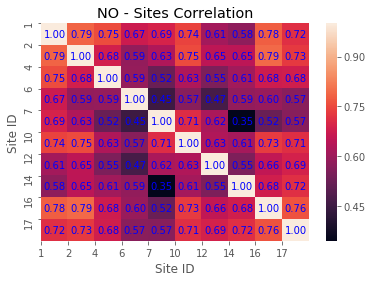

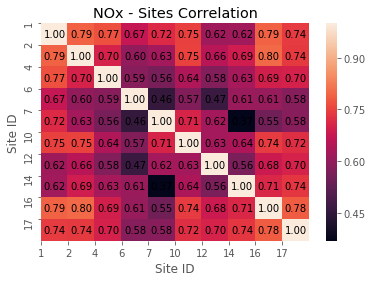

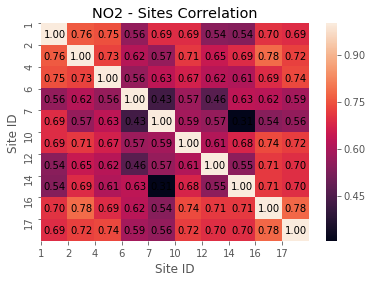

In [113]:
from mpctools.extensions.mplext import plot_matrix

import warnings
warnings.filterwarnings('ignore')

p=ba_s.drop('Date Time',axis=1)
nitrogenoxide=p['NO']
oxideofnitrogen=p['NOx']
nitrogendioxide=p['NO2']

xxxx = [0,1, 2, 3, 4,5,6,7,8,9]
labels = ['1', '2', '4', '6','7','10','12','14','16','17']

#display(nitrogenoxide.corr().tail(1))

nitrogenoxide=nitrogenoxide.corr().to_numpy()
oxideofnitrogen=oxideofnitrogen.corr().to_numpy()
nitrogendioxide=nitrogendioxide.corr().to_numpy()

plot_matrix(nitrogenoxide, mode='heatmap')
plt.xlabel('Site ID')
plt.ylabel('Site ID')
plt.title('NO - Sites Correlation')
plt.xticks(xxxx, labels)
plt.yticks(xxxx, labels)


for y in range(nitrogenoxide.shape[0]):
    for x in range(nitrogenoxide.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % nitrogenoxide[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='blue'
                 )


plt.savefig('4_6_1.png')
plt.show()


plot_matrix(oxideofnitrogen, mode='heatmap')
plt.ylabel('Site ID')
plt.xlabel('Site ID')
plt.title('NOx - Sites Correlation')
plt.xticks(xxxx, labels)
plt.yticks(xxxx, labels)

for y in range(oxideofnitrogen.shape[0]):
    for x in range(oxideofnitrogen.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % oxideofnitrogen[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
plt.savefig('4_6_2.png')
plt.show()



plot_matrix(nitrogendioxide, mode='heatmap')
plt.ylabel('Site ID')
plt.xlabel('Site ID')
plt.title('NO2 - Sites Correlation')
plt.xticks(xxxx, labels)
plt.yticks(xxxx, labels)

for y in range(nitrogendioxide.shape[0]):
    for x in range(nitrogendioxide.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % nitrogendioxide[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )


plt.savefig('4_6_3.png')
plt.show()






# [4.7] (4 points) 
Comment briefly on your observations from Question 4:(f): start by sum-
marising the results from the NO gas and then comment on whether the same is observed
in the other gases or if there is something different.

# Answer
For NO gas the lowest correlation (0.35) is between site 7 and site 14.
Site 6 has poor correlation (0.45) with Site 7 and Site 12.
All other pairs of Sites have correlation greater than 0.50.
In particular Site 1,2,16 & 17 have realitively high correlated with each other and most of the other sites.

These patterns are seen strongly in gas NOx and more so in gas N02


# Question 5 : (19 Points) Principal Component Analysis
One aspect which we have not yet explored is the temporal nature of the data.
That is, we need to keep in mind that the readings have a temporal aspect to
them which can provide some interesting insight. We will explore this next.
We have provided you with a new version of the dataset, BristolAir_DayAligned.csv ,
in which the data is organised by daily readings. That is the first two-columns indicate
the SiteID (for which we have selected a reduced subset to make the problem more man-
ageable), and the Date of the readings. The remaining 72 ( 24 × 3 ) columns (numbered
0 through 71) are the 24-hour readings for each of the `NOx', `NO2' and `NO' pollutants
respectively. Load the data into a pandas dataframe. Remember that the first line is
the header, and that the index columns should be `SiteID' and `Date': also, this is again
compressed using `bz2'. Look at the first few lines and familiarise yourself with the data.

In [20]:
ba_d = pd.read_csv(data_path_ba_day,compression='bz2',delimiter = ',', index_col=['SiteID','Date'], header=0)
ba_d.head()

0      1     2      3       4       5       6       7  \
SiteID Date                                                                    
1      2004-07-02  25.25  18.00  12.5   9.25    8.75   14.50   18.50   30.75   
       2004-07-03  22.25  21.00  23.5  33.75   15.50    9.00   14.00   57.75   
       2004-07-04  28.25  22.25  32.0  34.50   50.50   76.50  165.75  170.00   
       2004-07-05  56.75  62.50  79.5  78.50  115.75  149.00  175.00  119.00   
       2004-07-06  94.25  68.25  44.5  47.67   31.75   28.25   31.75   55.75   

                       8      9  ...     62     63    64     65     66     67  \
SiteID Date                      ...                                            
1      2004-07-02  35.25  39.00  ...  14.25  13.75  12.0  12.50  10.75  10.50   
       2004-07-03  49.75  49.75  ...  12.00  10.25  11.0  14.75  12.50  11.50   
       2004-07-04  63.25  57.75  ...  19.25  29.75  17.5  26.50  18.25  18.75   
       2004-07-05  83.75  94.75  ...  19.25  23.50  12.0  15.50  12.50  13.50   
       2004-07-06  41.00  37.75  ...   3.25   2.25   3.0   2.00   2.00   1.00   

                      68     69     70     71  
SiteID Date                                    
1      2004-07-02   9.25   9.00   7.75  10.75  
       2004-07-03   5.75   8.25   6.25   1.25  
       2004-07-04  12.50  14.00  20.75  26.00  
       2004-07-05  17.75  38.00  39.25  21.50  
       2004-07-06   0.75   0.75   1.00   0.25  

[5 rows x 72 columns]

# [5.1] (1 point) 

Plot the first 5 lines of data (plot each row as a single line-plot).
You may have noticed that it is very difficult to interpret the data in this manner, espe-
cially since there is also a lot of variation between different days. We will address this
by employing Principal Component Analysis (PCA), but in this case, we will do this to
capture the major sources of variability in the data and help us look at it in more detail.
Given that we know about the correlation in the data, we also expect that this will help
in dimensionality reduction.

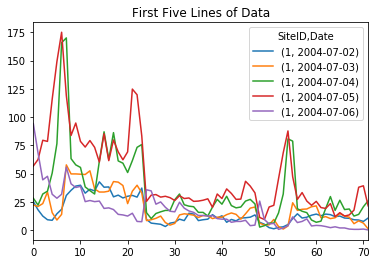

In [23]:
ba_d.head().T.plot.line()
plt.title('First Five Lines of Data')
plt.savefig('5_1.png')
plt.show()

# [5.2] (5 points) 

We will focus first on data solely from Site 1. 

Extract the data from this site, and 

run PCA with the number of components set to 72 for now. Set the random_state=0 . 

On a single graph plot: 

(i) the percentage of the variance explained by each principal component (as a bar-chart), 

(ii) the cumulative variance (line-plot) explained by the first n components: 
    
    ( Hint: you should use twinx() to make the plot fit ), and , 

(iii) mark the point at which the number of components collectively explain at least 95% of the variance (using a vertical line). 
    
    Hint: Number components starting from 1.

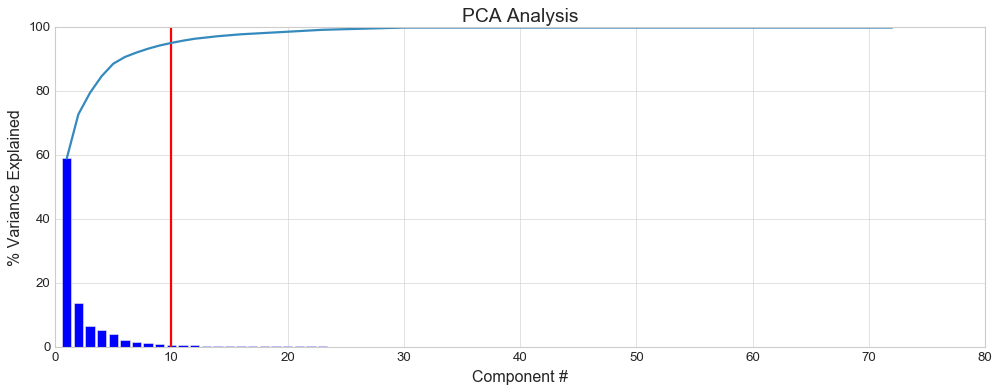

array([58.9, 72.7, 79.4, 84.6, 88.5, 90.6, 92. , 93.2, 94.2, 95. , 95.7,
       96.3, 96.7, 97.1, 97.4, 97.7, 97.9, 98.1, 98.3, 98.5, 98.7, 98.9,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

In [44]:
s1=ba_d.query('SiteID == 1')

pca = PCA(n_components=72, random_state=0)
pca.fit_transform(s1)

w=pca.explained_variance_ratio_*100

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,5))
xxx = range(1,len(w)+1)
plt.bar(xxx, w, color='blue', width=0.8)
plt.ylabel('% Variance Explained')
plt.xlabel('Component #')
plt.title('PCA Analysis')

plt.axvline(x=10, color='red')

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot(xxx,var)

#plt.xticks(xxx)

plt.savefig('5_2.png',bbox_inches='tight', pad_inches=0)
plt.show()

display(var)



# [5.3] (2 points) 

Interpret and summarise the above plot.




# Answer
The above plot shows us the number of components that will be sufficient to explain 95% of the data using PCA.
The bar chart gives the contribution of each component and the cumulative chart takes their cummulative sum.
The red line at Component # = 10 means that 10 components are sufficient in order to explain 95% of the data.
The % Variance Explained by each component decreases drastically as the component number increases.

# [5.4] (5 points) 

Generate three figures, one for the mean and one for each of the first 2 principal components: 

in each, plot the mean/component as three lines, one for each pollutant throught one day cycle. 
    
    Hint: You will need to reshape the components appropriately.

In [63]:
s1=ba_d.query('SiteID == 1')
pca = PCA(n_components=72, random_state=0)
pca.fit_transform(s1)
pdf = pd.DataFrame(pca.components_)
#display(pd.DataFrame(pca.components_))

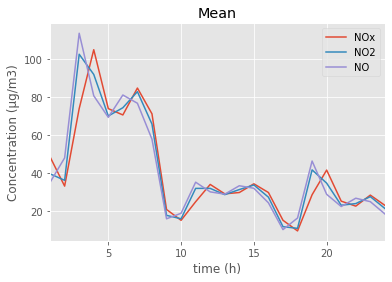

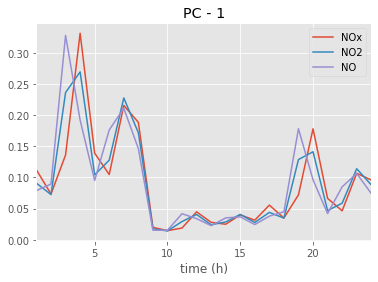

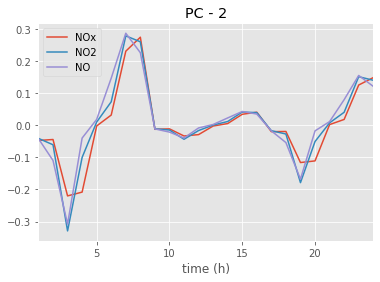

In [104]:
# pdf = pd.DataFrame(pc)
import warnings
warnings.filterwarnings('ignore')

pcm = pd.DataFrame(pca.mean_)
pc1 = pdf.head(1).T
pc2 = pdf.head(2).tail(1).T

pcm = pd.DataFrame(pcm.as_matrix().reshape(24,3))
pc1 = pd.DataFrame(pc1.as_matrix().reshape(24,3))
pc2 = pd.DataFrame(pc2.as_matrix().reshape(24,3))

pc1.index+= 1
pc1.columns=['NOx', 'NO2','NO']

pc2.index+= 1
pc2.columns=['NOx', 'NO2','NO']

pcm.index+= 1
pcm.columns=['NOx', 'NO2','NO']



pcm.plot()
plt.ylabel('Concentration (μg/m3)')
plt.xlabel('time (h)')
plt.title('Mean')
plt.savefig('5_4_1.png')
plt.show()

pc1.plot()
#plt.ylabel('Concentration (μg/m3)')
plt.xlabel('time (h)')
plt.title('PC - 1')
plt.savefig('5_4_2.png')
plt.show()

pc2.plot()
#plt.ylabel('Concentration (μg/m3)')
plt.xlabel('time (h)')
plt.title('PC - 2')
plt.savefig('5_4_3.png')
plt.show()


# [5.5] (6 points) 

Focusing on the mean and first principal component, are there any significant patterns which emerge throughout the day? 

    Hint: Think about car usage throughout the day. 
    
What is different when interpreting the mean versus the first component? 
    
    Hint: Do peaks signify the same thing in both cases? 
    
Looking at the principal components only, are there any signifficant differences between the pollutants? Why could this be happening? 

    Hint: You can refer to one of the limitations of PCA.

# Answer


For all three pollutants the pattern through the day is very simmilar for both the mean and the first Principal Component. Both the mean and the first Principal Component have a highest peak in hour 3. They also have a second highest peak in hour 7. Moreover, at around hour 9 both drop significantly in magnitude. In the following hours both have small varations in magnitude until hour 19 where they have their third highest peak. 

The peak of the mean-pc signifies the highest average concentration of the pollutants, whereas the peak of the first pc siginifies the highest variation in concentration of the pollutants.

Thoughout the day, all three polutant concentrations vary in the same pattern. The differences could be due to the different proprotions in which NO, NO2 and NOx are present in the air.


#The concentration for all three gases is the highest between hour 1 and hour 4. For both mean-pc and pc-1 there is a #drop in concentration overall at the 5 hour mark. For mean-pca the concentrations rises to its second highest peak at #hour 7. For pc-1 the concentrations start approaching 0 at hour 12. All three concentrations vary in the same pattern #in #the mean-pc. NO2 and NOx have simmilar patterns but NO2 stays close to 0 for most of the day in pc-1. The #differences #between concentrations in the three pollutants are more noticable in the first half of the day.

# Question 6 : (41 points) Regression
    
Given our understanding of the correlation between signals and sites, we will
now attempt to predict the NOx level for Site 17 given the value at the
other sites. 

We will evaluate our models using the Root Mean Squared Error
(RMSE) i.e. the square root of the mean_squared_error score by sklearn.


To do this we will again make use of the time-aligned data in BristolAir_SiteAligned .

Reload this dataset and extract only the NOx values. Then split this into a feature-set
( X ) and target value for site 17 ( y ).

In [19]:
ba_s = pd.read_csv(data_path_ba_site,compression='bz2',delimiter = ',',header=[0, 1],parse_dates=[0])
pd.set_option('display.max_columns', None)

X=ba_s['NOx'].drop('17',axis=1)
y=ba_s[('NOx','17')]

# X.columns = ba_s.columns.droplevel()
# X = ba_s.drop('17', axis=1,level=1)
# X = X.drop('Date Time',axis=1)
# y = ba_s.drop(['1','2','4','6','7','10','12','14','16'], axis=1, level=1)
# y = y.drop('Date Time',axis=1)


# [6.1] (2 points) 

First things first: since we are dealing with a supervised task, we will
need to split our data into a training and testing set. 

Furthermore, since some of our
regressors will involve hyper-parameter tuning, we will also need a validation set. Use the
multi_way_split() method from mpctools.extensions.skext to split the data into a
Training (60%), Validation (15%) and Testing (25%) set: use the ShuffleSplit object from
sklearn for the splitter . Set the random state to 0. 

    Hint: The method gives you the indices of the split for each set, which can then be applied to multiple matrices. 

Report
the sizes of each dataset.

In [20]:
from sklearn.model_selection import ShuffleSplit
from mpctools.extensions.skext import multi_way_split

Xa=X.to_numpy()
(a,b,c)=multi_way_split(y, (0.6,0.15,0.25), ShuffleSplit, random_state=0)

Xtr,Xvl,Xte = Xa[a],Xa[b],Xa[c]
ytr,yvl,yte = y[a],y[b],y[c]


#display(pd.DataFrame(xtr))
#display(ytr)
#8937, 2234, 3724,  14895

#print(len(xtr),len(xvl),len(xte))
#print(len(ytr),len(yvl),len(yte))



# Answer

training set size: 8937 --- validation set size: 2234 --- testing set size: 3724

# [6.2] (4 points) 

Let us start with a baseline. By using only the y -values, what baseline
regressor can you define (indicate what it does)? 

Implement it and report the RMSE on
the training and validation sets. 

Interpret this relative to the statistics of the data.

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

dr=DummyRegressor(strategy='median')
dr.fit(yvl,yvl)

y_pred = dr.predict(yvl)

rms = sqrt(mean_squared_error(yvl, y_pred))

rms

ytr.describe()

count    8937.000000
mean       98.320578
std        79.718306
min         0.750000
25%        41.000000
50%        78.750000
75%       134.000000
max       801.250000
Name: (NOx, 17), dtype: float64

# Answer

Using only y-values and always predicting the median of the y-values, the RMSE are the following:
    
RMSE on training set = 82.1  - RMSE on validation set = 82.2

Std training = 79.7 - Std validation = 80.2 

The RMSE values are close to the standard deviation of the y-values which means that our baseline regressor is nearly the equivalent of randomly guessing y-values.





# [6.3] (3 points) 

Let us now try a more interesting algorithm: specifically, we will start
with LinearRegression. 

Train the regressor on the training data and 

report the RMSE on
the training and validation set, and 

comment on the relative performance to the baseline. 

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(copy_X=True)
lr.fit(Xtr, ytr)
y_pred = lr.predict(Xvl)

rms = sqrt(mean_squared_error(yvl, y_pred))

rms

41.12740349422

# Answer

RMSE on training set = 39.8

RMSE on validation set = 41.1

THe linear Regressor is significantly better than the baseline regressor, as it nearly halves the RMSE of the baseline regressor for both the validation set and the training set.



# [6.4] (5 points) 

We want to explore further what the model is learning. 

Explain why in
Linear Regression, we cannot just blindly use the weights of the regression coefficients
to evaluate the relative importance of each feature, but rather we have to normalise the
features. 

By referring to the documentation for the LinearRegression implementation in
SKLearn, explain what the normalisation does and how it helps in comparing features.


Will this affect the performance of the Linear Regressor?

# Answer

If we compare the coefficients blindly then regardless of their relative importance, the coefficients from features with higher mean (and lower std) will always be larger. This is because the scales of these features are not the same. Normalizing the features gives all of them the same mean and standard deviation which makes their coefficients comparable and allows us to find their relative importance. The SKLearn implementation can normalize the regressor by subtracting the mean and dividing by the Euclidean norm. It will not affect the performance.

# [6.5] (5 points) 

Retrain the regressor, setting normalize=True and 

report (in a table) the ratio of the relative importance of each feature. 

Which is the most/least important site?

How do they compare with the correlation coefficients for Site 17 as computed in Question 4:(f), and 

why do you think that is?

In [132]:
lr = LinearRegression(normalize=True,copy_X=True)
lr.fit(Xtr, ytr)
m=pd.DataFrame()
n=lr.coef_
m['Site ID']=X.columns.values
#m['Relative Importance (Percentage)']=trunc(abs(n)/sum(n)*100,2)
m['Relative Importance']=trunc(abs(n),2)

m.set_index('Site ID', inplace=True)
m

print(m.T.to_latex())



\begin{tabular}{lrrrrrrrrr}
\toprule
Site ID &     1 &    2 &     4 &    6 &     7 &    10 &    12 &    14 &    16 \\
\midrule
Relative Importance &  0.11 &  0.0 &  0.13 &  0.0 &  0.05 &  0.07 &  0.12 &  0.09 &  0.16 \\
\bottomrule
\end{tabular}



In [24]:
y_pred_vl = lr.predict(Xvl)
y_pred_tr = lr.predict(Xtr)

rms_vl = sqrt(mean_squared_error(yvl, y_pred_vl))
rms_tr = sqrt(mean_squared_error(ytr, y_pred_tr))

print(rms_vl)
print(rms_tr)

41.12740349422
39.83472027954455


# Answer

The most important site is SiteID 16 with relative importance 14.86%.
The least important site is SiteID 6 with relative importance 0.87%.

The correlation coefficients from q4.6 are not normalized, therefore they are not direclty comparable with the correlation coefficients from the normalized linear regressor (the normalized correlation coefficients are much smaller than the pearson correlation coefficients). 

However, they do align with  each other i.e SiteID 16 has the highest pearson correaltion coefficient as well as the highest normalized regression coefficients.
SiteID 6 has the least pearson correaltion coefficient as well as the least normalized regression coefficients.

This is because if the pearson correlation coefficients were normalized they would be the same as the normalized regression coefficients.

        
   1 	 2 	     4 	     6 	     7 	     10 	12 	     14 	16 	
        
 0.72 	0.73 	0.68 	0.57 	0.57 	0.71 	0.69 	0.72 	0.76     q4.6 (correlation with site 17)
 
 0.12 	0.01 	0.13 	-0.01 	0.06 	0.08 	0.13 	0.09 	0.16     correlation coefficients
 
 
 


# [6.6] (5 points) 

It might be that with non-linear models, we may get better performance.
Let us try to use K-Nearest-Neighbours.

Train a KNN regressor with default parameters
on the training set and report performance on the training and validation set. 

    Hint: it might be beneficial to set n_jobs=-1 to improve performance. 

How does it compare with
Linear Regression in terms of performance on both sets? 

What is a limitation of the KNN
algorithm for our dataset?

In [25]:
knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(X,y)

y_pred_vl = knn.predict(Xvl)
y_pred_tr = knn.predict(Xtr)

rms_vl = sqrt(mean_squared_error(yvl, y_pred_vl))
rms_tr = sqrt(mean_squared_error(ytr, y_pred_tr))

print(rms_vl)
print(rms_tr)


31.703773009114055
32.10345911627926


# Answer

Linear Regression RMSE on Validation is 41.1 and on Training is 39.8
KNN Regressor RMSE on Validation is 31.7 and on Training is 32.1
KNN uses euclidean distance which is sensitive to magnitudes. The features in our data set with high magnitudes weigh more than the features with low magnitudes. This would not be a limitation if we normalize our data. However our data also has high dimmensionality which makes KNN less accurate.


# [6.7] (4 points) 

The KNN regression allows setting a number of hyper-parameters. We
will optimise only one: the number of neighbours to use. 

By using the validation set, find
the optimal value for the n_neighbours parameter out of the values [2, 4, 8, 16, 32]. 

Plot
the training/validation RMSE and indicate (for example with a line) the best value for
n_neighbours .

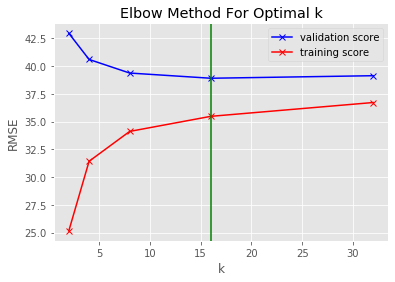

[42.95551269008171,
 40.595609577419665,
 39.37125304834977,
 38.901851355962386,
 39.13083888473987]

In [45]:
k_list = [2,4,8,16,32]

RMSE_vl=[]
RMSE_tr=[]

for k in k_list:
    knn=KNeighborsRegressor(n_neighbors=k,n_jobs=-1)
    knn.fit(Xtr,ytr)
    y_pred_vl = knn.predict(Xvl)
    y_pred_tr = knn.predict(Xtr)
    rms_vl = sqrt(mean_squared_error(yvl, y_pred_vl))
    rms_tr = sqrt(mean_squared_error(ytr, y_pred_tr))
    RMSE_vl.append(rms_vl)
    RMSE_tr.append(rms_tr)

plt.plot(k_list, RMSE_vl, 'bx-', label='validation score',color='blue')
plt.plot(k_list, RMSE_tr, 'bx-', label='training score',color='red')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=16, color='green')
plt.legend()
plt.savefig('6_7.png')
plt.show()

display(RMSE_vl)
    

# [6.8] (1 points) 

What is the best-case RMSE performance on the validation set for KNN?

# Answer
best-case RMSE = 38.9 with n_neighbors=16

# [6.9] (4 points) 

Let us try one last regression algorithm: we will now use DecisionTreeRe-
gressor. Again, the algorithm contains a number of hyper-parameters, and we will opti-
mise the depth of the tree. 

Train a series of Decision Tree Regressors, optimising (over the
validation set) the max_depth over the values [2, 4, 8, 16, 32, 64]. Set random_state=0 .


Plot the training/validation RMSE and indicate (as before) the best value for max_depth .

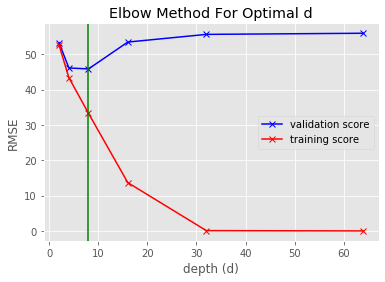

[53.25095179219833,
 46.12769116861275,
 45.84380928287788,
 53.4486396323909,
 55.62441997967441,
 55.9470657647145]

In [44]:
from sklearn.tree import DecisionTreeRegressor

d_list = [2,4,8,16,32,64]

RMSE_vl=[]
RMSE_tr=[]

for d in d_list:
    dtr=DecisionTreeRegressor(max_depth=d,random_state=0)
    dtr.fit(Xtr,ytr)
    y_pred_vl = dtr.predict(Xvl)
    y_pred_tr = dtr.predict(Xtr)
    rms_vl = sqrt(mean_squared_error(yvl, y_pred_vl))
    rms_tr = sqrt(mean_squared_error(ytr, y_pred_tr))
    RMSE_vl.append(rms_vl)
    RMSE_tr.append(rms_tr)

plt.plot(d_list, RMSE_vl, 'bx-', label='validation score',color='blue')
plt.plot(d_list, RMSE_tr, 'bx-', label='training score',color='red')
plt.xlabel('depth (d)')
plt.ylabel('RMSE')
plt.title('Elbow Method For Optimal d')
plt.axvline(x=8, color='green')
plt.legend()

plt.savefig('6_9.png')

plt.show()

display(RMSE_vl)

# [6.10] (3 points) 

What is the best-case RMSE performance on the validation set? 

What
do you notice from the plot about the performance of the Decision Tree Regressor?

# Answer
best-case RMSE = 45.8 with max_depth=8

The performance of the Decision Tree is signinficantly better on the training set than the validation set.
The performacne on the validation set decreases after max_depth=8 i.e the performance decreases as the performance on the training set increases (because the regressor becomes more over-fit). 

# [6.11] (5 points) 

To conclude let us now compare all the models on the testing set. 

Combine the training and validation sets and retrain the model from each family on it: in cases where we optimised hyper-parameters, set this to the best-case value. 

Report the
testing-set performance of each model in a table 

    Hint: You should have 4 values .

In [41]:
#Combining Training and Validation Sets
Xc=np.concatenate((Xtr, Xvl), axis=0)
yc=np.concatenate((ytr, yvl), axis=0)

In [42]:
#******DR************
dr=DummyRegressor(strategy='median')
dr.fit(Xc, yc)
y_pred_dr = dr.predict(Xte)
rms_dr = sqrt(mean_squared_error(yte, y_pred_dr))

#******LR************
lr = LinearRegression(normalize=True,copy_X=True)
lr.fit(Xc, yc)
y_pred_lr = lr.predict(Xte)
rms_lr = sqrt(mean_squared_error(yte, y_pred_lr))

#******DTR************
dtr=DecisionTreeRegressor(max_depth=8,random_state=0)
dtr.fit(Xc,yc)
y_pred_dtr = dtr.predict(Xte)
rms_dtr = sqrt(mean_squared_error(yte, y_pred_dtr))

#******KNN************
knn=KNeighborsRegressor(n_neighbors=16,n_jobs=-1)
knn.fit(Xc,yc)
y_pred_knn = knn.predict(Xte)
rms_knn = sqrt(mean_squared_error(yte, y_pred_knn))



print(rms_dr,rms_lr,rms_dtr,rms_knn)

80.7434777184233 40.509026852617026 43.06887110128105 37.98496506868247


# Answer

RMSE for base-line Regressor       80.7

RMSE for Linear Regressor          40.5

RMSE for Decision Tree Regressor   43.1

RMSE for K Neighbours Regressor    38.0